In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
plt.style.use('seaborn')
my_cmap = sns.light_palette("Navy", as_cmap=True)

In [2]:
train_data = pd.read_excel('data/2023-E2-Finding-Vulnerabilities-Training.xlsx')
experiment_data = pd.read_excel('data/2023-E2-Finding-Vulnerabilities-Experiment.xlsx')

In [5]:
experiment_data.columns

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName',
       'RecipientEmail', 'ExternalReference', 'DistributionChannel',
       'UserLanguage', 'Q49_4', 'Q128', 'Q129', 'Which Group',
       'Coder Experience', 'WorkingJava', 'FindingVulns', 'Timing_First Click',
       'Timing_Last Click', 'Timing_Page Submit', 'Timing_Click Count',
       'PathLines', 'PathMotivation ', 'InjectionLines', 'InjectionMotivation',
       'XSSLines ', 'XSSMotivation', 'DoSLines', 'DoSMotivation',
       'Familiar.Java', 'Familiar.Vuln', 'Difficulty.Marks_1',
       'Difficulty.Marks_2', 'Difficulty.Marks_3', 'Difficulty.Marks_4',
       'Difficulty.Correct_1', 'Difficulty.Correct_2', 'Difficulty.Correct_3',
       'Difficulty.Correct_4', 'Process.Understand', 'Process.Time',
       'Process.Training', 'Process.Material', 'Process.remarks'],
      dtype='object')

dos_f.java: line 463, 475, 534 <br />
dos_s.java: line 51, 55, 109 <br />
path_f.java: line 368, 383, 384, 859, 860 <br />
path_s.java: line 76, 78, 79, 119, 120 <br />
user_f.java: line 286, 287, 288, 289, 290, 291, 292, 293, 294, 295 <br />
user_s.java: line 86, 87, 88, 89, 90, 91, 92 <br />
xss_f.java: line 429, 430, 450, 451 <br />
xss_s.java: line 69, 70, 75, 76 <br />

Group1: dos_s.java; path_f.java; user_s.java; xss_f.java <br />
Group2: dos_f.java; path_s.java; user_f.java; xss_s.java <br />
Group3: dos_f.java; path_s.java; user_s.java; xss_f.java <br />
Gropu4: dos_s.java; path_f.java; user_f.java; xss_s.java <br />
Gropu5: dos_f.java; path_f.java; user_s.java; xss_s.java <br />
Gropu4: dos_s.java; path_s.java; user_f.java; xss_f.java <br />


In [6]:
gt = {'dos_f': [463,475,534], 'dos_s':[51,55,109], 
      'path_f': [368,383,384,859,860], 'path_s': [76,78,79,119,120],
      'xss_f':[429,430,450,451], 'xss_s':[69,70,75,76]}
group = {1:['dos_s','path_f','user_s','xss_f'],
         2:['dos_f','path_s','user_f','xss_s'],
         3:['dos_f','path_s','user_s','xss_f'],
         4:['dos_s','path_f','user_f','xss_s'],
         5:['dos_f','path_f','user_s','xss_s'],
         6:['dos_s','path_s','user_f','xss_f']}

In [59]:
experiment_data.where(experiment_data['Q129']=='Yes', inplace=True)
train_data.where(train_data['Agree']=='Yes', inplace=True)
train_data.dropna(how='all', inplace=True)
experiment_data.dropna(how='all', inplace=True)
df_group = experiment_data['Which Group'].iloc[1:]
print(df_group.value_counts())

Group4    18
Group6    15
Group3    15
Group2    12
Group1    12
Group5     9
Name: Which Group, dtype: int64


In [60]:
df_valid_data = pd.merge(experiment_data, train_data,  how='inner', left_on=['Q49_4'], right_on = ['StudentIDFiller_4'])
df_valid_data['Which Group'].iloc[1:].value_counts()

Group4    16
Group6    15
Group3    15
Group2    12
Group1    10
Group5     8
Name: Which Group, dtype: int64

Text(0, 0.5, 'Group')

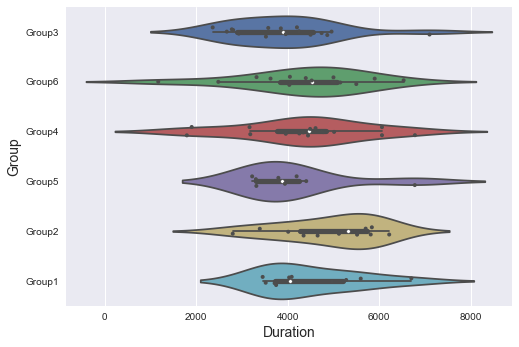

In [66]:
df_valid_data['Duration (in seconds)_x'] = pd.to_numeric(df_valid_data['Duration (in seconds)_x'])
df_valid_data['Duration (in seconds)_y'] = pd.to_numeric(df_valid_data['Duration (in seconds)_y'])
sns.violinplot(data=df_valid_data[['Duration (in seconds)_x', 'Which Group']], x="Duration (in seconds)_x", y="Which Group")

# Add in points to show each observation
sns.stripplot(data=df_valid_data[['Duration (in seconds)_x', 'Which Group']], x="Duration (in seconds)_x", y="Which Group",
              size=4, color=".3", linewidth=0)
plt.xlabel('Duration', fontsize=14)
plt.ylabel('Group', fontsize=14)

In [76]:
x = df_valid_data['PathLines'][0].split(';')
len(x[0])

127

In [62]:
def extract_answer(data, name):
    def assign_index(answer):
        if answer == None or answer == np.nan:
            return 0
        else:
            return int(answer)

    group_result = data[name].str.split(';')
    # df_answer = pd.Series([list() for _ in range(len(data.index))], index=data.index)
    for i in group_result:
        group_result[i]
        if len(i) > 4:
            return np.nan
        else:
            try:
                int(i)
            except:
                if 
        bool_array = group_result[i].str.split('.',expand=True)[0]
        bool_array = bool_array.apply(assign_index)
        for idx in df_answer.index:
            df_answer.loc[idx].append(bool_array.loc[idx]) if bool_array.loc[idx]!=0 else None
    return df_answer

0     The code within the while(true) statement in t...
1                                                    75
2                                    76;112;157;180;212
3                                                   114
4                                               119,121
                            ...                        
72                                           76;115;117
73                                  479;854;927;928;930
74                                             239;397;
75                                                 483;
76                                               76;107
Name: PathLines, Length: 77, dtype: object

## Answer data proprecess

In [155]:
def extend_digit(lis):
    if len(lis) == 2:
        digit1, digit2 = int(lis[0]), int(lis[1])
        min = digit1 if digit1 <= digit2 else digit2
        max = digit2 if digit2 > digit1 else digit1
        return [i for i in range(min, max+1)]
    else:
        return np.nan

def preprocess(x):
    def recursive_process(x):
        x.remove('') if '' in x else None
        new_x = []
        for i in x:
            try:
                new_x.append(int(i))
            except:
                if len(i) <= 1:
                    return np.nan
                elif ',' in i:
                    new_x.extend(list(map(int, str(i).split(','))))
                elif ':' in i:
                    new_x.extend(extend_digit(str(i).split(':')))
                elif '-' in i:
                    new_x.extend(extend_digit(str(i).split('-')))
                else:
                    return np.nan
        return new_x   
      
    if len(x[0]) > 10:
        return np.nan
    else:
        flag, new_x = [], None
        while True:
           new_x = recursive_process(x)
           if flag == new_x or np.isnan(np.nan):
               break
           flag = new_x
        return new_x

df_answer = df_valid_data[['Which Group', 'Q49_4']]

answer_list = ['PathLines', 'InjectionLines', 'XSSLines ', 'DoSLines']
for ans in answer_list:
    print(ans)
    df_answer = df_answer.merge(df_valid_data[ans].str.split(';').apply(preprocess).rename(ans+'Answer'), left_index=True, right_index=True)
df_answer

PathLines
InjectionLines
XSSLines 
DoSLines


,Which Group,Q49_4,PathLinesAnswer,InjectionLinesAnswer,XSSLines Answer,DoSLinesAnswer
0,Group3,Amin,NaN,"[86, 87, 88, 89, 90, 91, 92]","[345, 346, 347, 348, 349, 350, 351, 352, 353, ...","[413, 414, 415, 416, 417, 418, 419, 420, 421, ..."
1,Group6,Zongayao,[75],"[142, 274, 290]",[347],[68]
2,Group4,Sanskar,"[76, 112, 157, 180, 212]",[151],[88],"[76, 112, 157, 180, 212]"
3,Group6,Vishnu Dev,[114],[180],[342],[68]
4,Group3,Abhilash,"[119, 121]",[89],"[434, 445]",[438]
...,...,...,...,...,...,...
72,Group6,Ankush,"[76, 115, 117]","[151, 153]","[441, 445]",[151]
73,Group5,Xingyou,"[479, 854, 927, 928, 930]",[87],[87],"[422, 749]"
74,Group4,yixin,"[239, 397]","[144, 151, 235, 250]",[87],"[76, 111, 156, 175, 211]"
75,Group1,Mahesh,[483],[87],[447],[190]


In [48]:
experiment_data.where(experiment_data['Which Group']=='Group3')[['Which Group','Q49_4']].dropna()

,Which Group,Q49_4
1,Group3,Amin
5,Group3,Abhilash
6,Group3,Tim
9,Group3,Nina
11,Group3,Bogdan
19,Group3,Lu
20,Group3,Anastasios
23,Group3,Sreenidhi
29,Group3,Alina
33,Group3,Jagriti
